# Part I - Ford GoBike System Data
## by Luke Confait

## Introduction
Ford GoBike, which is currently called Bay Wheels and owned by lyft, is a Bike sharing service operating in the greater San Francisco Bay area. The data set is comprised of 183412 bike trips undertaken in February 2019.


> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy import distance
from geopy import Point
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

Taking a look at the overall structure of the dataset

In [4]:
print(bike_data.shape)


(183412, 16)


In [5]:
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


I have decided to perform some initial data cleaning to assist in creating visualisations

In [9]:
print(bike_data['end_station_name'].nunique())
print(bike_data['start_station_name'].nunique())

329
329


There are 329 stations, since this is a large number it will make for difficult to interpret visualisations and so this feature will not be investigated.

Make a Copy for data cleaning.

In [10]:
bike_data_copy = bike_data.copy()

Rows are dropped where __'member_birth_year'__ is null. This also deals with Null values in the __'member_gender'__ column.

In [11]:
bike_data_copy.dropna(subset=['member_birth_year'],inplace=True)

In [12]:
bike_data_copy.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

The time and date for start and end is put into seperate columns.

In [13]:
bike_data_copy['start_date'] = pd.to_datetime(bike_data_copy.start_time).dt.date
bike_data_copy['start_time'] = pd.to_datetime(bike_data_copy.start_time).dt.time

bike_data_copy['end_date'] = pd.to_datetime(bike_data_copy.end_time).dt.date
bike_data_copy['end_time'] = pd.to_datetime(bike_data_copy.end_time).dt.time


Print the min and max __'start_date'__ to determine the period of data collection.

In [14]:
print(min(pd.to_datetime(bike_data_copy['start_date'])))
print(max(pd.to_datetime(bike_data_copy['start_date'])))

2019-02-01 00:00:00
2019-02-28 00:00:00


In [15]:
print(bike_data_copy['start_time'].sample(1))
print(bike_data_copy['end_time'].sample(1))

179064    15:28:43.999000
Name: start_time, dtype: object
154652    09:39:30.783000
Name: end_time, dtype: object


It would be useful to have a **'start_day_of_week'** feature for analysis.

In [18]:
bike_data_copy['start_day_of_week'] = pd.to_datetime(bike_data_copy['start_date']).dt.day_name()

It would interesting to see if the trips were between 2 different station or if the trip ended at the same place.

In [19]:
bike_data_copy['same_end_and_start_station'] = bike_data_copy['start_station_id'] == bike_data_copy['end_station_id']
bike_data_copy['same_end_and_start_station'].value_counts()

False    171689
True       3458
Name: same_end_and_start_station, dtype: int64

In 3458 trips the trip ended at the station it started at so distance as the crow files will be 0 as from this dataset the distance can only be calculated from the latitude and longitude of the start and end stations.

The straight line distance between the start and end stations be engineered from the longitude and latitudes of the start and end stations. This stackoverflow [post](https://stackoverflow.com/questions/55909305/using-geopy-in-a-dataframe-to-get-distances) proved useful in figuring out how to implement this.

In [20]:
# Use geopy to get the start and end points of each trip
bike_data_copy['start_point'] = bike_data_copy.apply(
    lambda x: Point(latitude=x['start_station_latitude'], longitude=x['start_station_longitude']),
    axis=1)
bike_data_copy['end_point'] = bike_data_copy.apply(
    lambda x: Point(latitude=x['end_station_latitude'], longitude=x['start_station_longitude']),
    axis=1)
    
bike_data_copy['start_point'].sample(5)

16626     37 46m 35.9011s N, 122 23m 43.8947s W
102610      37 47m 28.68s N, 122 23m 56.5836s W
26555     37 48m 1.85796s N, 122 16m 19.4876s W
169820      37 20m 33.81s N, 121 53m 44.2212s W
67555     37 52m 48.8008s N, 122 16m 10.5322s W
Name: start_point, dtype: object

In [21]:
# use the geopy distance method to get the distance between the start and end points
bike_data_copy['distance_km'] = bike_data_copy.apply(lambda x: distance.distance(x['start_point'],x['end_point']).km,axis=1)

Drop columns that wont be analysed or are no longer needed

In [22]:
bike_data_copy.drop(['bike_id','start_point','end_point','start_station_id','start_station_name','end_station_id','end_station_name'],axis=1,inplace=True)

In [23]:
bike_data_copy.shape

(175147, 16)

There are a number of columns that have categorical values and so the data type should be changed to reflect this.

In [24]:
bike_data_copy['user_type'].value_counts()

Subscriber    158516
Customer       16631
Name: user_type, dtype: int64

In [25]:
bike_data_copy['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [26]:
bike_data_copy['bike_share_for_all_trip'].value_counts()

No     157788
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [27]:
bike_data_copy['user_type'] = bike_data_copy['user_type'].astype('category')
bike_data_copy['member_gender'] = bike_data_copy['member_gender'].astype('category')
bike_data_copy['bike_share_for_all_trip'] = bike_data_copy['bike_share_for_all_trip'].astype('category')

In [28]:
bike_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec                  175147 non-null int64
start_time                    175147 non-null object
end_time                      175147 non-null object
start_station_latitude        175147 non-null float64
start_station_longitude       175147 non-null float64
end_station_latitude          175147 non-null float64
end_station_longitude         175147 non-null float64
user_type                     175147 non-null category
member_birth_year             175147 non-null float64
member_gender                 175147 non-null category
bike_share_for_all_trip       175147 non-null category
start_date                    175147 non-null object
end_date                      175147 non-null object
start_day_of_week             175147 non-null object
same_end_and_start_station    175147 non-null bool
distance_km                   175147 non-null float64
dtypes: bool(1), category(3), fl

In [29]:
bike_data_copy.to_csv('FordGoBike_final.csv',index=False)

In [30]:
bike_data_analysis = pd.read_csv('FordGoBike_final.csv')

### What is the structure of your dataset?

The cleaned dataset contains 175147 entries with 16 features.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the duration of the trip (duration_sec), start time and date of the trip and the distance (distance_km) between the end and start station

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The effect of the above mentioned features on each other will help to determine the times and day of month (weekdays will also be considered) with the longest trips. Categorical variables such as user_type, member_birth_year and member_gender will allow for comparisons to be drawn about how different categories of people use the service.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [51]:
#Set a base color for plots to use
base_color = sb.color_palette()[1]

The trip duration variable is the most important variable for comparing trips in the dataset so the investigation can start with its distribution.

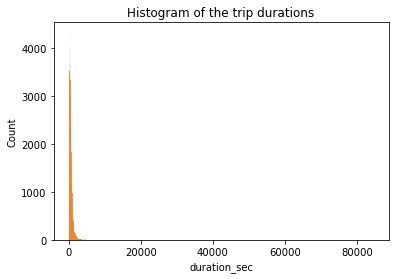

In [52]:
sb.histplot(data=bike_data_analysis, x='duration_sec',color=base_color);
plt.title('Histogram of the trip durations');

Most of the points are clustered at the lower end and it drops of quickly, there are also a small number of extremely long durations. A logarithmic scale would be more suitable in displaying the distribution.

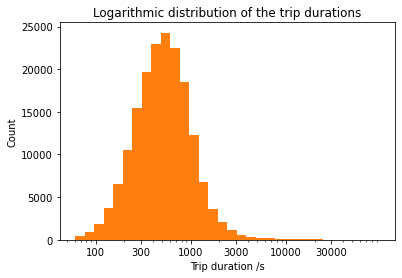

In [53]:
min_duration = bike_data_analysis['duration_sec'].min()
max_duration = bike_data_analysis['duration_sec'].max()

ticks = [100, 300, 1000, 3000, 10000, 30000]

bins = 10 ** np.arange(np.log10(min_duration),np.log10(max_duration)+0.1,0.1)
plt.hist(data=bike_data_copy,x='duration_sec',bins=bins,color=base_color);
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Trip duration /s')
plt.ylabel('Count')
plt.title('Logarithmic distribution of the trip durations');



The data is unimodal centred around 500 s which is about 8 minutes after being logarithmically tranformed.

The start date of the trips can be useful to see how usage varies over 

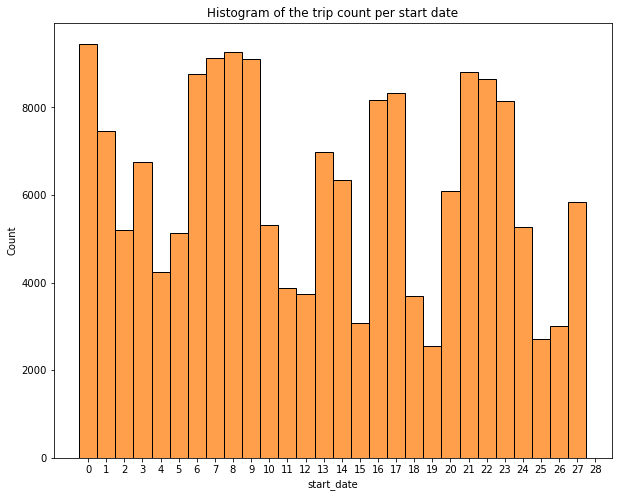

In [54]:
plt.figure(figsize=[10,8])
g = sb.histplot(data=bike_data_analysis,x='start_date',color=base_color)
ticks = [i for i in range(29)]

plt.xticks(ticks,ticks);
plt.title('Histogram of the trip count per start date');


While the days with more trips can be easily seen had more trips than others it would be better to see it by day of the week.

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

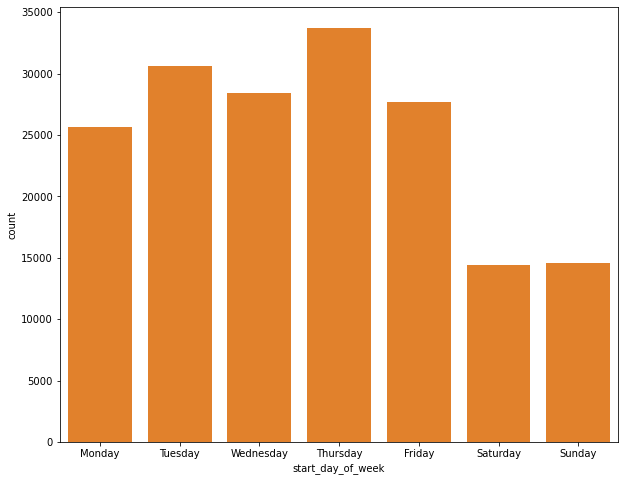

In [56]:
plt.figure(figsize=[10,8])
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=bike_data_analysis, x='start_day_of_week',order=days,color=base_color)
plt.xticks

Saturday and Sunday see the lowest trip count and Thursday the highest trip count. Work related trips only could explain the discrepancy between weekday and weekend trip count.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

